# Install libraries

In [1]:
!pip install catboost
!pip install category_encoders

# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Load Data

In [3]:
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


# Data exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 



- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking


In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [9]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

<Axes: >

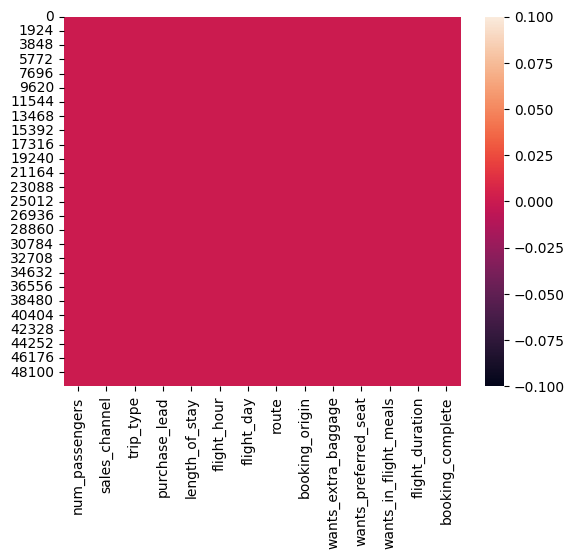

In [10]:
sns.heatmap(df.isnull())

# data analysis

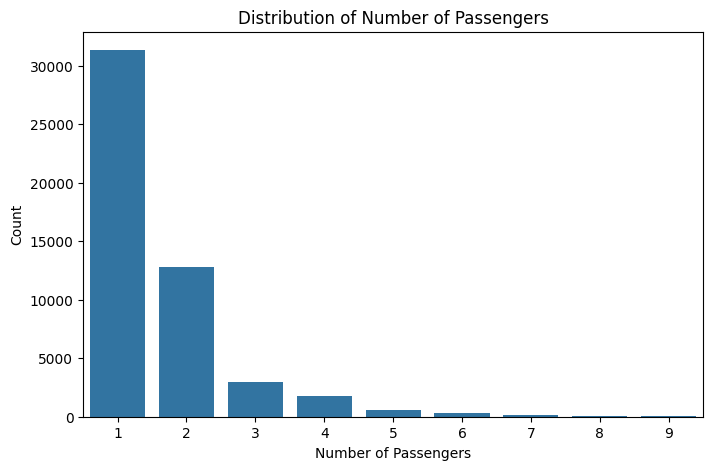

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(x='num_passengers', data=df)
plt.title('Distribution of Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Count')
plt.show()

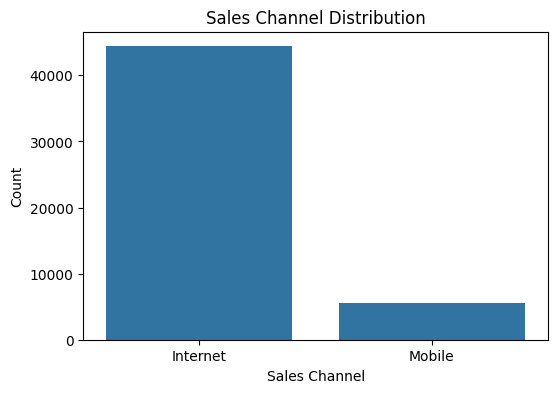

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='sales_channel', data=df)
plt.title('Sales Channel Distribution')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.show()

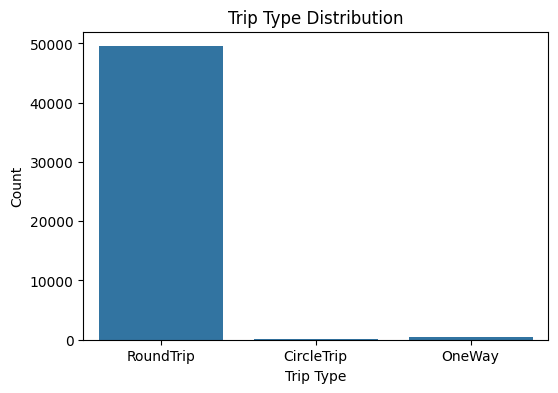

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='trip_type', data=df)
plt.title('Trip Type Distribution')
plt.xlabel('Trip Type')
plt.ylabel('Count')
plt.show()


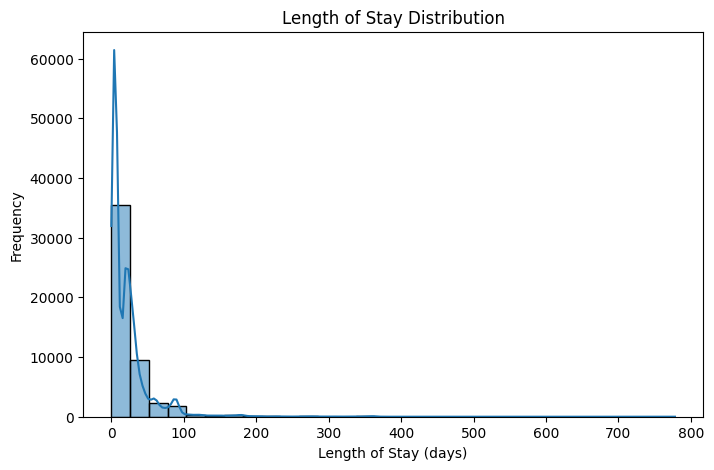

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df['length_of_stay'], kde=True, bins=30)
plt.title('Length of Stay Distribution')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.show()


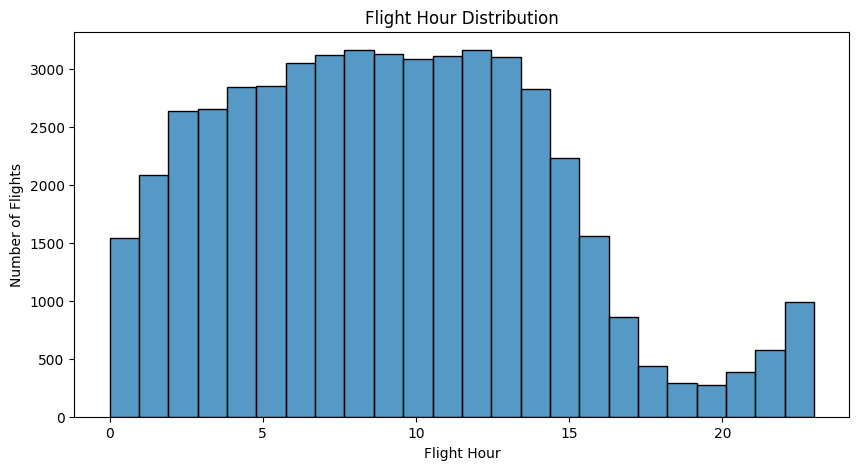

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(df['flight_hour'], bins=24, kde=False)
plt.title('Flight Hour Distribution')
plt.xlabel('Flight Hour')
plt.ylabel('Number of Flights')
plt.show()

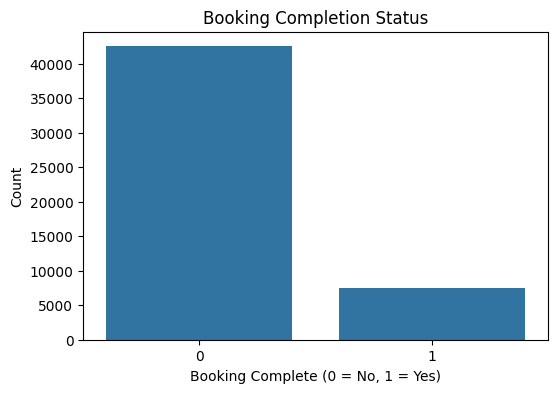

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='booking_complete', data=df)
plt.title('Booking Completion Status')
plt.xlabel('Booking Complete (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

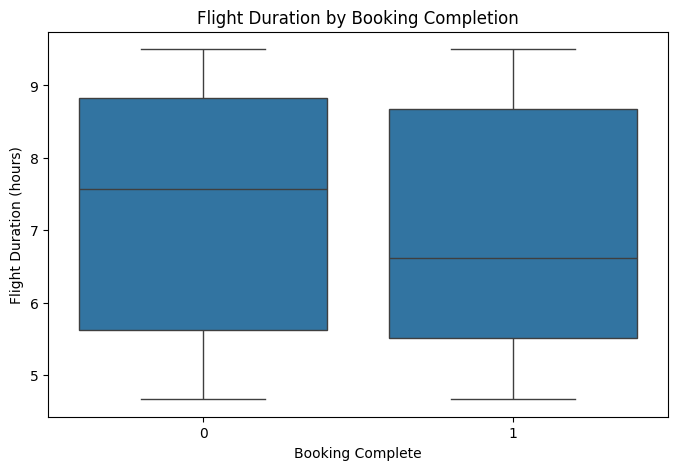

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x='booking_complete', y='flight_duration', data=df)
plt.title('Flight Duration by Booking Completion')
plt.xlabel('Booking Complete')
plt.ylabel('Flight Duration (hours)')
plt.show()

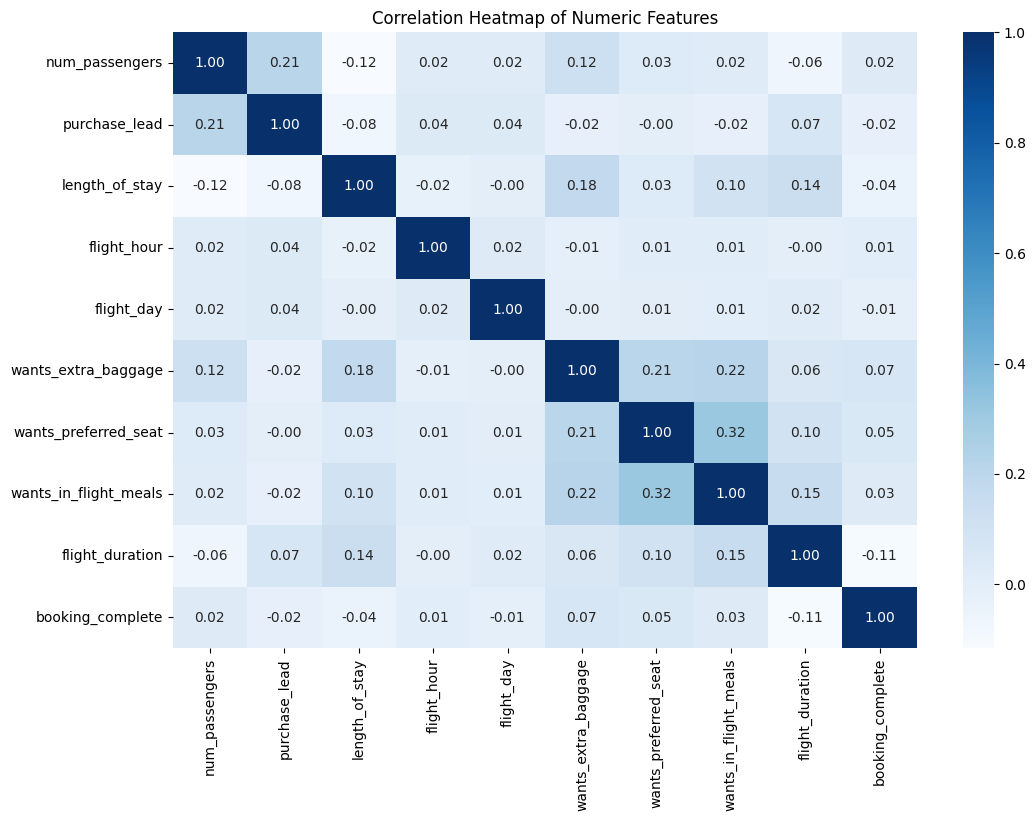

In [18]:
plt.figure(figsize=(12,8))
numeric_df = df.select_dtypes(include=['number'])  # خذ الأعمدة الرقمية فقط
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

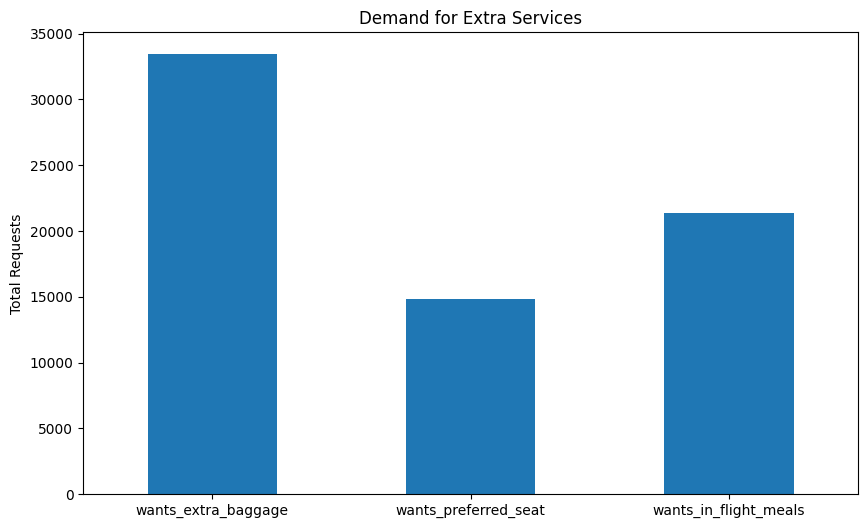

In [19]:
plt.figure(figsize=(10,6))
service_columns = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']
df[service_columns].sum().plot(kind='bar')
plt.title('Demand for Extra Services')
plt.ylabel('Total Requests')
plt.xticks(rotation=0)
plt.show()

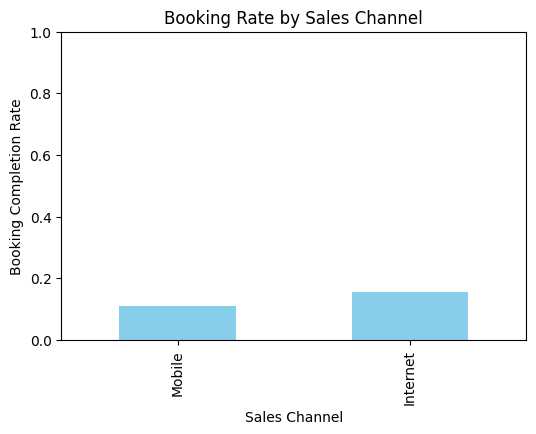

In [20]:
# Booking rate by sales_channel
booking_by_channel = df.groupby('sales_channel')['booking_complete'].mean().sort_values()

plt.figure(figsize=(6,4))
booking_by_channel.plot(kind='bar', color='skyblue')
plt.title('Booking Rate by Sales Channel')
plt.ylabel('Booking Completion Rate')
plt.xlabel('Sales Channel')
plt.ylim(0, 1)
plt.show()

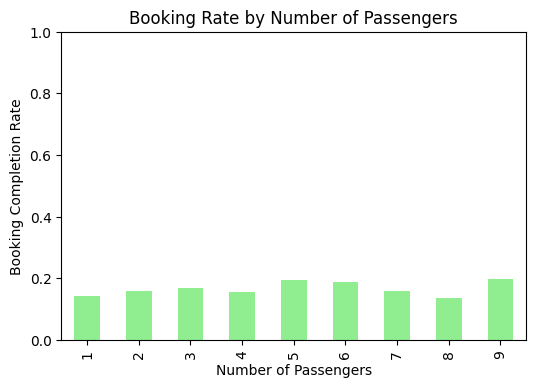

In [21]:
booking_by_passengers = df.groupby('num_passengers')['booking_complete'].mean()

plt.figure(figsize=(6,4))
booking_by_passengers.plot(kind='bar', color='lightgreen')
plt.title('Booking Rate by Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Booking Completion Rate')
plt.ylim(0, 1)
plt.show()

In [22]:
binary_cols = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']
for col in binary_cols:
    rate = df.groupby(col)['booking_complete'].mean()
    print(f"\nBooking rate by {col}:\n{rate}")


Booking rate by wants_extra_baggage:
wants_extra_baggage
0    0.115029
1    0.166662
Name: booking_complete, dtype: float64

Booking rate by wants_preferred_seat:
wants_preferred_seat
0    0.137944
1    0.177061
Name: booking_complete, dtype: float64

Booking rate by wants_in_flight_meals:
wants_in_flight_meals
0    0.141396
1    0.160509
Name: booking_complete, dtype: float64


# Preparing data for a model

In [23]:
df['is_weekend_flight'] = df['flight_day'].isin(['Saturday', 'Sunday']).astype(int)
df['is_long_stay'] = (df['length_of_stay'] > df['length_of_stay'].median()).astype(int)
df['lead_duration_interaction'] = df['purchase_lead'] * df['flight_duration']

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_passengers             50000 non-null  int64  
 1   sales_channel              50000 non-null  object 
 2   trip_type                  50000 non-null  object 
 3   purchase_lead              50000 non-null  int64  
 4   length_of_stay             50000 non-null  int64  
 5   flight_hour                50000 non-null  int64  
 6   flight_day                 50000 non-null  int64  
 7   route                      50000 non-null  object 
 8   booking_origin             50000 non-null  object 
 9   wants_extra_baggage        50000 non-null  int64  
 10  wants_preferred_seat       50000 non-null  int64  
 11  wants_in_flight_meals      50000 non-null  int64  
 12  flight_duration            50000 non-null  float64
 13  booking_complete           50000 non-null  int

In [25]:
df.head(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend_flight,is_long_stay,lead_duration_interaction
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,1,1446.24
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,1,618.24
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0,1,1341.36


In [26]:
categorical_cols = ['sales_channel', 'trip_type', 'route', 'booking_origin']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [27]:
counts = df['booking_complete'].value_counts()
print(counts)

booking_complete
0    42522
1     7478
Name: count, dtype: int64


In [28]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(df.drop(columns=['booking_complete']), df['booking_complete'])

df.loc[:, df.columns != 'booking_complete'] = X_resampled
df['booking_complete'] = y_resampled

print(df['booking_complete'].value_counts())

booking_complete
0    42522
1     7478
Name: count, dtype: int64


In [29]:
y_resampled.value_counts()

,count
booking_complete,
0,42522
1,42522


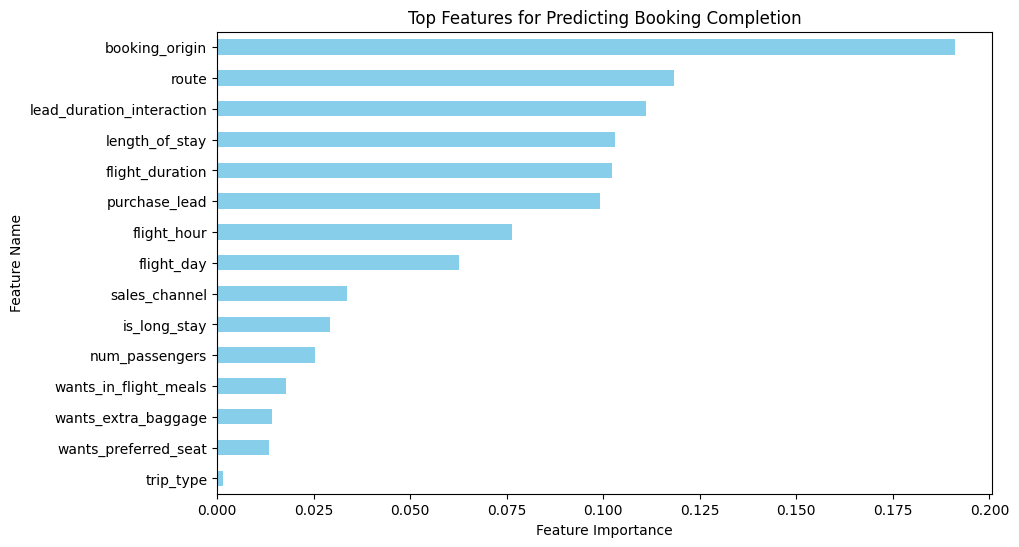

In [30]:
from sklearn.ensemble import RandomForestClassifier

X = X_resampled
y = y_resampled

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
top_features.plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top Features for Predicting Booking Completion')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.show()

In [31]:
top_features = importances.sort_values(ascending=False).head(15)
print(top_features)

booking_origin               0.191137
route                        0.118381
lead_duration_interaction    0.111136
length_of_stay               0.103073
flight_duration              0.102404
purchase_lead                0.099248
flight_hour                  0.076398
flight_day                   0.062648
sales_channel                0.033552
is_long_stay                 0.029311
num_passengers               0.025416
wants_in_flight_meals        0.017940
wants_extra_baggage          0.014359
wants_preferred_seat         0.013413
trip_type                    0.001583
dtype: float64


In [32]:
top_features = importances.sort_values(ascending=False).head(9).index
X_selected = X[top_features]
print(X_selected)

       booking_origin  route  lead_duration_interaction  length_of_stay  \
0                  61      0                1446.240000              19   
1                  61      0                 618.240000              20   
2                  36      0                1341.360000              22   
3                  61      0                 529.920000              31   
4                  36      0                 375.360000              22   
...               ...    ...                        ...             ...   
85039              51      6                1060.300148              18   
85040              40      6                 631.943195              31   
85041              51    470                  53.096563              36   
85042              93    380                  51.300258              20   
85043              51    645                1094.920000               5   

       flight_duration  purchase_lead  flight_hour  flight_day  sales_channel  
0             5.520

In [33]:

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Model building

In [34]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [35]:
model = CatBoostClassifier()
model.fit(X_train, y_train)

Learning rate set to 0.062447
0:	learn: 0.6759192	total: 116ms	remaining: 1m 56s
1:	learn: 0.6609749	total: 179ms	remaining: 1m 29s
2:	learn: 0.6479178	total: 236ms	remaining: 1m 18s
3:	learn: 0.6355880	total: 297ms	remaining: 1m 13s
4:	learn: 0.6253874	total: 339ms	remaining: 1m 7s
5:	learn: 0.6117345	total: 372ms	remaining: 1m 1s
6:	learn: 0.6043018	total: 447ms	remaining: 1m 3s
7:	learn: 0.5928542	total: 469ms	remaining: 58.1s
8:	learn: 0.5867925	total: 492ms	remaining: 54.2s
9:	learn: 0.5818617	total: 522ms	remaining: 51.7s
10:	learn: 0.5769937	total: 557ms	remaining: 50s
11:	learn: 0.5726979	total: 603ms	remaining: 49.7s
12:	learn: 0.5682108	total: 658ms	remaining: 49.9s
13:	learn: 0.5617113	total: 725ms	remaining: 51.1s
14:	learn: 0.5578670	total: 779ms	remaining: 51.2s
15:	learn: 0.5541982	total: 862ms	remaining: 53s
16:	learn: 0.5505703	total: 894ms	remaining: 51.7s
17:	learn: 0.5473331	total: 914ms	remaining: 49.8s
18:	learn: 0.5453067	total: 939ms	remaining: 48.5s
19:	learn: 

In [36]:
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Accuracy: {train_accuracy:.4f}")

test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, test_predictions)
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:\n", classification_report(y_test, test_predictions))

Training Accuracy: 0.8757
Test Accuracy: 0.8650

Confusion Matrix:
[[7410 1034]
 [1263 7302]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      8444
           1       0.88      0.85      0.86      8565

    accuracy                           0.86     17009
   macro avg       0.87      0.87      0.86     17009
weighted avg       0.87      0.86      0.86     17009



# End of project!